In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
%matplotlib inline
import seaborn as sns

# 一、五王之战

battles.csv包含《权利的游戏》中所有的战争。

In [147]:
battles=pd.read_csv('game of thrones/battles.csv')
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [20]:
battles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null object
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null fl

In [26]:
battles.shape

(38, 25)

In [131]:
df0=battles.copy()#备份数据

**name**: 战争的名称，字符变量。  
**year**: 战争发生的年份，数值变量。  
**battle_number**: 本数据中的id，对应每一场独立的战役，数值变量。  
**attacker_king**: 攻击方的国王，"/"表示了国王的更换。例如："Joffrey/Tommen Baratheon"意味着Tomen Baratheon继承了Joffrey的王位，分类变量。  
**defender_king**: 防守方的国王，分类变量。  
**attacker_1**: 攻击方将领，字符变量。  
**attacker_2**: 攻击方将领，字符变量。  
**attacker_3**: 攻击方将领，字符变量。  
**attacker_4**: 攻击方将领，字符变量。  
**defender_1**: 防守方将领，字符变量。  
**defender_2**: 防守方将领，字符变量。  
**defender_3**: 防守方将领，字符变量。  
**defender_4**: 防守方将领，字符变量。  
**attacker_outcome**: 从攻击方角度来看的战争结果，分别有：win, loss, draw，分类变量。  
**battle_type**: 战争的类别。pitched battle: 正面激战；ambush: 伏击战；siege: 围攻战；razing: 突袭战。分类变量。
**major_death**: 是否有重要人物的死亡，二分类变量。    
**major_capture**: 是否有重要人物的被捕，二分类变量。    
**attacker_size**: 攻击方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。  
**defender_size**: 防守方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。  
**attacker_commander**: 攻击方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。  
**defender_commander**: 防守方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。  
**summer**: 战争是否发生于夏天，二分类变量。  
**location**: 战争发生的地点，字符变量。  
**region**: 战争发生的地域，分类变量。  
**note**: 注释，字符变量。  


## 数据清洗

#### 1、按照剧情填写部分空值
1. *对Siege of Winterfell进行填充* 

In [148]:
battles.iat[37,13]='win'
battles.loc[battles['name']=='Siege of Winterfell','battle_type']='siege'
battles.loc[battles['name']=='Siege of Winterfell','major_death']=0
battles.loc[battles['name']=='Siege of Winterfell','major_capture']=0

#### 2、变换攻击方将领与防守方将领的形式，做成人数统计
1. *defender_count：防守方将领人数*
2. *attacker_count：攻击方将领人数*
3. *去除'attacker_2', 'attacker_3', 'attacker_4', 'defender_2', 'defender_3', 'defender_4', 'note'列*

In [150]:
battles.loc[:, "defender_count"] = (4 - battles[["defender_1", "defender_2", "defender_3", "defender_4"]].isnull().sum(axis = 1))
battles.loc[:, "attacker_count"] = (4 - battles[["attacker_1", "attacker_2", "attacker_3", "attacker_4"]].isnull().sum(axis = 1))
battles = battles.drop(['attacker_1','attacker_2', 'attacker_3', 'attacker_4',  'defender_1','defender_2', 'defender_3', 'defender_4', 'note'], axis=1)

#### 3、计算每场战争攻击方指挥官与防守方指挥官的人数
1. *attacker_com_num：防守方指挥官人数*
2. *defender_com_num：攻击方指挥官人数*

In [151]:
battles['attacker_com_num']=[len(x) if type(x) == list else np.nan for x in battles.attacker_commander.str.split(",")]
battles['defender_com_num']=[len(x) if type(x) == list else np.nan for x in battles.defender_commander.str.split(",")]

#### 4、更改数据中的格式
1. *将分类变量转换格式*
2. *year与battle_number 转换成object*

In [152]:
battles['attacker_king'] = battles['attacker_king'].astype('category')
battles['defender_king'] = battles['defender_king'].astype('category')
battles['battle_type'] = battles['battle_type'].astype('category')
battles['region'] = battles['region'].astype('category')
battles['year'] = battles['year'].astype('object')
battles['battle_number'] = battles['battle_number'].astype('object')

In [31]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,defender_count,attacker_count,attacker_com_num,defender_com_num
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,1,1,1.0,2.0
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,1,1,1.0,1.0
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,1,1,2.0,2.0
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,1,1,5.0,4.0
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,1,2,2.0,1.0


In [153]:
battles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 20 columns):
name                  38 non-null object
year                  38 non-null object
battle_number         38 non-null object
attacker_king         36 non-null category
defender_king         35 non-null category
attacker_outcome      38 non-null object
battle_type           38 non-null category
major_death           38 non-null float64
major_capture         38 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null float64
location              37 non-null object
region                38 non-null category
defender_count        38 non-null int64
attacker_count        38 non-null int64
attacker_com_num      37 non-null float64
defender_com_num      28 non-null float64
dtypes: category(4), float64(7), int64(2), object(7)
memory usag

In [33]:
sum(battles.duplicated())

0

## 数据探索

根据已知剧情发展，提出以下疑问：  
**战争的条件（攻击方，防守方，战场）：**  
1、哪一位国王好战，经常发起战争？  
2、哪位国王经常被攻击？  
3、哪两个家族发生战争次数最多？  
4、哪一个区域经常被选为战场？  
**战争的方式：**  
1、每个国王的攻击方式有什么不同？  
2、不同国王在战争中的指挥官的人数？   
3、战争和夏季的关系？  
**战争的结果：**    
1.每年死亡或被俘的重要人物是多少？    
2.每个区域死亡或被俘的重要人物人数？    
3.战争结果是否与兵力多少有关系？  
4.胜负榜单如何？

### 战争的条件

*1、哪一位国王好战，经常发起战争？*

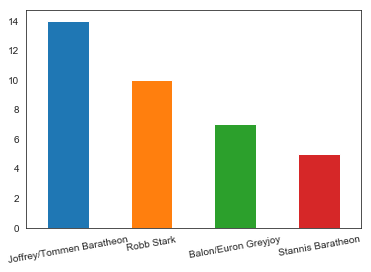

In [154]:
battles.attacker_king.value_counts().plot(kind='bar',rot=10)
plt.show()

- Joffrey和Tommen所引发的战争次数最多，其实质代表着兰尼斯特家族。  
joffrey统治期间任意妄为，反复无常，同时因为各个领主不承认Joffrey的合法地位。      
- Stark家族排第二，Robb因父亲遇害，故开始复仇之战  
- Greyjoy家族原本在坦格利安时期是允许铁民有自己的首领的。  
但在劳勃拜拉席恩时期Balon曾因反叛铁王座失败，至唯一的儿子被Stark家族作为人质。  
随着劳勃之死，再次自立为王，先后攻克了深林堡、临冬城和托伦方城，后Euron又突袭了河湾地  

*2、哪位国王经常被攻击？*

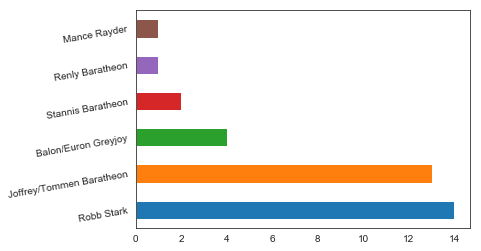

In [155]:
battles.defender_king.value_counts().plot(kind='barh',rot=10)
plt.show()

- 实际上主要是Robb与Joffrey互相之间的攻击战，其次就是Robb与Greyjoy，Joffrey与Stannis之间的战争。

*3、哪两个家族发生战争次数最多？*

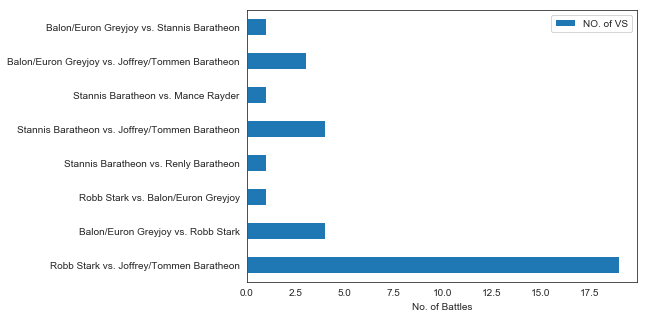

In [156]:
from collections import Counter
c = list(Counter([tuple(set(x)) for x in battles.dropna(subset = ["attacker_king", "defender_king"])[["attacker_king", "defender_king"]].values if len(set(x)) > 1]).items())
pd2 = pd.DataFrame(c).plot.barh(figsize = (7, 5))
pd2.set(yticklabels = ["%s vs. %s" % (x[0], x[1]) for x in list(zip(*c))[0]], xlabel = "No. of Battles")
pd2.legend(['NO. of VS'])
plt.show()

- 可以看出，狼家和狮子家，还有海怪家的战争最多，这也与剧作情况是相符的。

*4、哪一个区域经常被选为战场？*

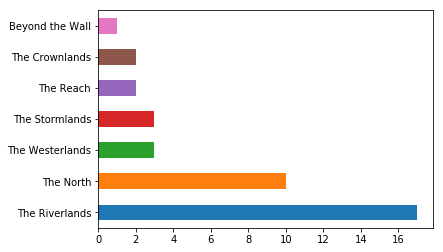

In [37]:
battles.region.value_counts().plot(kind='barh')
plt.show()

- 河间地因为地理原因，经常被作为战场
- 北境也因为低于广阔和狼家的原因，仅次于河间地

### 战争的方式

*1、每个国王的攻击方式有什么不同？*

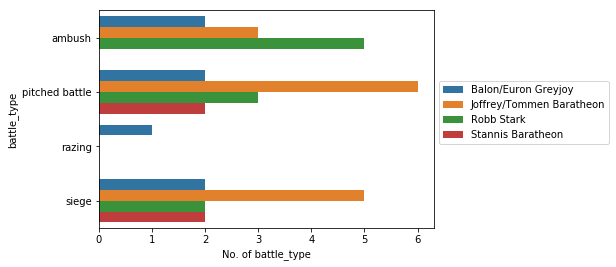

In [264]:
x=sns.countplot(y='battle_type', hue='attacker_king', data = battles)
x.set(xlabel = "No. of battle_type", ylabel = "battle_type")
plt.legend(bbox_to_anchor=(1, 0.7))
plt.show()

- 整体来说，打法主要以正面激战为主
- Joffrey/Tommen Baratheon的14场战争中有6场正面激战、5场围攻战和3场伏击战。  
- 史塔克10场战争中有5场伏击战和3场正面激战和2场围攻战。  
- 能够看出Joffrey/Tommen Baratheon一方的打法更偏向正面激战，毕竟有兰尼斯特家族，军队人数不是问题。史塔克更偏向伏击战。  
- 还能够看出只有Balon/Euron Greyjoy进行过突袭战,即攻击青亭岛。盾牌列岛失守后，雷德温海峡与青亭岛也遭受铁民攻击。                   

*2、不同国王在战争中的指挥官的人数？*

>1.每个家族的指挥官有多少？  
>2.哪场战争的指挥官数有异常？为什么？

In [239]:
 #定义一个函数来统计指挥官人数
def zhg(battles,k_name):
    list1=[]
    for i in battles.attacker_commander:
        index=battles[battles.attacker_king==k_name].index
        for n in index:
            m=str(battles.attacker_commander[n]).split(',')
            for k in m:
                k=k.strip(' ')
                if not k in list1:
                    list1.append(k)              
    return list1

def sum_zhg(battles,k_name):
    list2=zhg(battles,k_name)
    for i in battles.defender_commander:
        index=battles[battles.defender_king==k_name].index
        for n in index:
            m=str(battles.defender_commander[n]).split(',')
            for k in m:
                k=k.strip(' ')
                if not k in list2:
                    list2.append(k)
    return list2

In [240]:
#（1）每个家族的指挥官有多少？
king_name=['Joffrey/Tommen Baratheon','Robb Stark','Balon/Euron Greyjoy','Stannis Baratheon']
NOcommander=[]
for king in king_name:
    NO=len(sum_zhg(battles,king))
    NOcommander.append(NO)
Commander=pd.DataFrame(NOcommander,index=king_name,)
Commander.columns=['NO.of NOcommanders']
Commander

,NO.of NOcommanders
Joffrey/Tommen Baratheon,36
Robb Stark,27
Balon/Euron Greyjoy,6
Stannis Baratheon,13


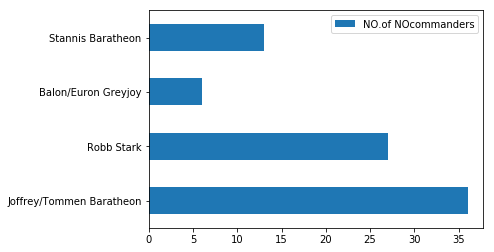

In [241]:
Commander.plot(kind='barh')

- 此步通过数据处理，将所有战役中，每个家族在战役中出现过的指挥官的人数统计。当然，可以通过调用sum_zhg函数来查看他们的名字。
- 它体现出一个家族具备战役指挥能力的人才数，是一个家族可持续发展的前提。
- 兰尼斯特家族的指挥官人数最多，这得益于其家族的财富，很多Commander因为利益而效忠兰尼斯特。
另外，兰尼斯特家族本身也很大，也使得这个数量增加
- 史塔克家族是北境最古老、最显赫也是最重要的家族，北境地域广阔，诸侯众多，但在妹妹莱安娜和哥哥布兰登被杀后，家族继承人变得很少。
- 葛雷乔伊家族所处地区环境严酷，地形峻峭。再加上当年谋反儿子被杀，所以人数最少
- 这张图能够很好的反映出一个家族的规模、实力储备、资金情况和拥护程度


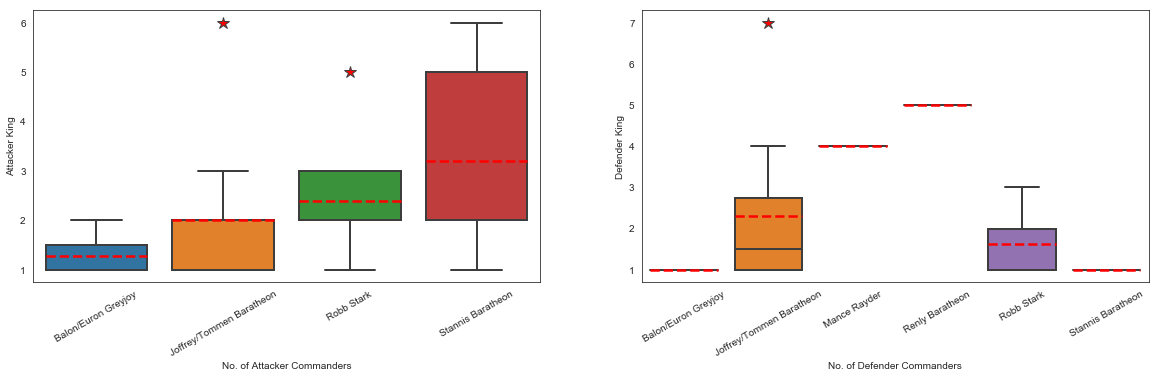

In [157]:
#（2）攻击战和防守战每场战役指挥官箱线图
meanlineprops = dict(linestyle='--', linewidth=2.5, color='red')
flierprops = dict(marker="*", markerfacecolor='red', markersize=12,linestyle='none')
fig, axes = plt.subplots(1,2,figsize=(20, 5))  
att = sns.boxplot("attacker_king", "attacker_com_num", data = battles,ax = axes[0],showmeans=True, meanline= True,linewidth=2,meanprops=meanlineprops,flierprops=flierprops)
att.set(xlabel = "No. of Attacker Commanders", ylabel = "Attacker King")
plt.setp(att.get_xticklabels(), rotation=30)
defe = sns.boxplot("defender_king", "defender_com_num", data = battles,ax = axes[1],showmeans=True, meanline= True,linewidth=2,meanprops=meanlineprops,flierprops=flierprops)
defe.set(xlabel = "No. of Defender Commanders", ylabel = "Defender King")
plt.setp(defe.get_xticklabels(), rotation=30)
plt.show()

- 在攻击战中兰尼斯特和史塔克分别有两个点异常点，都发生在河间地，分别是Battle of the Fords和Battle of the Green Fork  
- 在防卫战中，兰尼斯特有一个异常点，发生在君临城的Battle of the Blackwater
- 其中可以发现，在河间地发生的战役，双方都会增加指挥官，这是因为河间地地理位置特殊，使它成为了一块战争频发、流血成河的是非之地。绿叉河以北方的颈泽为源头，奔腾南下是有易于防守的天然边界。
- 在攻击战和防卫战中，发生在河间地的Battle of the Green Fork（绿叉河之役）双方的指挥官人数都高出整体，这是泰温进入河间地以来所遭遇的首次有力抵抗，但被亚当·马尔布兰的骑兵队发现了袭击部队，虽未达到预期效果，但至少给了罗柏·史塔克的骑兵袭击孪河城外的兰尼斯特军的机会。
- Battle of the Blackwater（黑水河之役），五王之战中最大的战役，而且就发生在临冬城，自然要加强部署。

*3、战争和夏季的关系？*

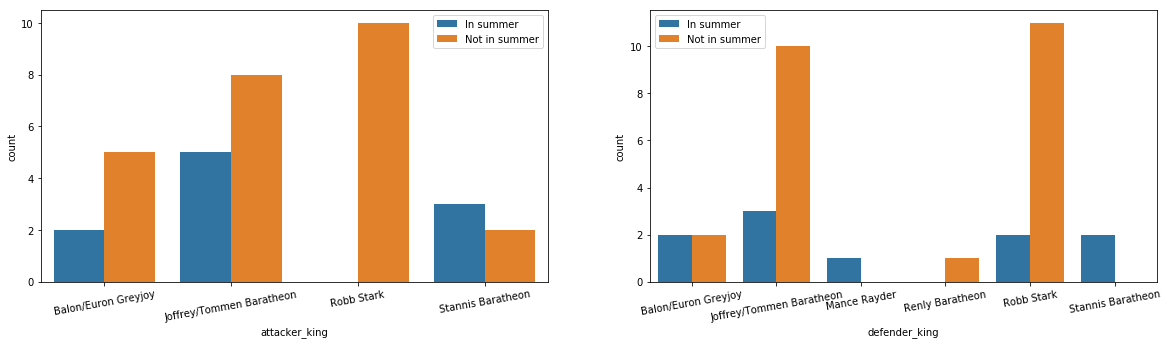

In [300]:
fig, axes = plt.subplots(1,2,figsize=(20, 5))  
summary1=sns.countplot(x='attacker_king',hue='summer',ax = axes[0],data = battles)
plt.setp(summary1.get_xticklabels(), rotation=10)
summary1.legend(["In summer", "Not in summer"])
summary2=sns.countplot(x='defender_king', hue='summer',ax = axes[1],data = battles)
summary2.legend(["In summer", "Not in summer"])
plt.setp(summary2.get_xticklabels(), rotation=10)
plt.show()

- 这个很明显就可以看出，在北境的史塔克家族在winter coming后就不再主动攻击了，毕竟环境也不允许。
- 在防卫战中，北境在冬季有两场战役，是发生在河间地的Siege of Riverrun和Siege of Raventree，这是五王之战的尾声，红色婚礼之后，此时Robb已经被杀。
- Siege of Riverrun第二次奔流城之战：红色婚礼之后，艾德慕·徒利被俘，兰尼斯特-佛雷联军将奔流城围住。布林登拒绝投降。詹姆将艾德慕放回城中，并威胁他如果不献出城池，他将血洗奔流城并将其未出世的孩子杀掉，最终艾德慕只能屈服。
- Siege of Raventree鸦树城攻防战：杰诺斯·布雷肯伯爵奉命率军攻打他的老对手——布莱伍德家族的居城鸦树城。双方经过激战不分胜负。泰陀斯·布莱伍德宁死不肯向杰诺斯投降。最终只能由詹姆爵士出面受降。此役终了，标志着河间地的大规模战斗就此结束。

### 战争的结果

*1.每年死亡或被俘的重要人物是多少*

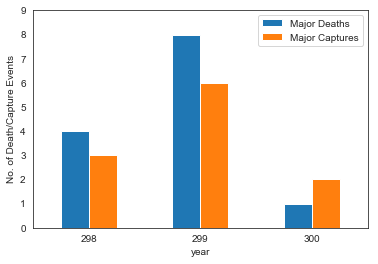

In [44]:
sns.set_style("white")
Cap = battles.groupby('year').sum(axis=0)[["major_death", "major_capture"]].plot.bar(rot = 0)
Cap.set(xlabel = "year", ylabel = "No. of Death/Capture Events", ylim = (0, 9))
Cap.legend(["Major Deaths", "Major Captures"])
plt.show()

- 299年是战争的爆发年，也是死亡和被俘人数最多的一年

*2.每个区域死亡或被俘的重要人物人数？*

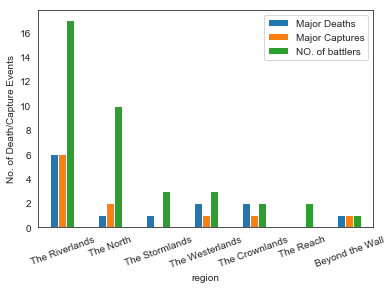

In [46]:
data = battles.groupby('region').sum(axis=0)[['major_death', 'major_capture']]
pd1 = pd.concat([data, battles.region.value_counts().to_frame()], axis = 1).sort_values('region', ascending = False).plot.bar(rot=20)
pd1.set(xlabel = "region", ylabel = "No. of Death/Capture Events")
pd1.legend(["Major Deaths", "Major Captures",'NO. of battlers'])
plt.show()

- 可以看出在The Riverlands发生的战争最多，死亡和被俘的人物也最多，而血色婚礼也发生在此，史塔克家族在这里伤亡惨重。北境虽然发生的战争多，但死亡的重要人物少。

*3.战争结果是否与兵力多少有关系？*

>1. 进攻方与防御方的兵力差异怎么样？
>2. 哪一场战争的参战人数最多？
>3. 兵力和胜负有关系吗？

In [270]:
data = battles[["name","attacker_size", "defender_size", "attacker_outcome"]].dropna(axis=0,how='any')
data['Difference_Size'] = data.attacker_size - data.defender_size
data['sum_size']=data.attacker_size + data.defender_size
data.head()

,name,attacker_size,defender_size,attacker_outcome,Difference_Size,sum_size
0,Battle of the Golden Tooth,15000.0,4000.0,win,11000.0,19000.0
2,Battle of Riverrun,15000.0,10000.0,win,5000.0,25000.0
3,Battle of the Green Fork,18000.0,20000.0,loss,-2000.0,38000.0
4,Battle of the Whispering Wood,1875.0,6000.0,win,-4125.0,7875.0
5,Battle of the Camps,6000.0,12625.0,win,-6625.0,18625.0


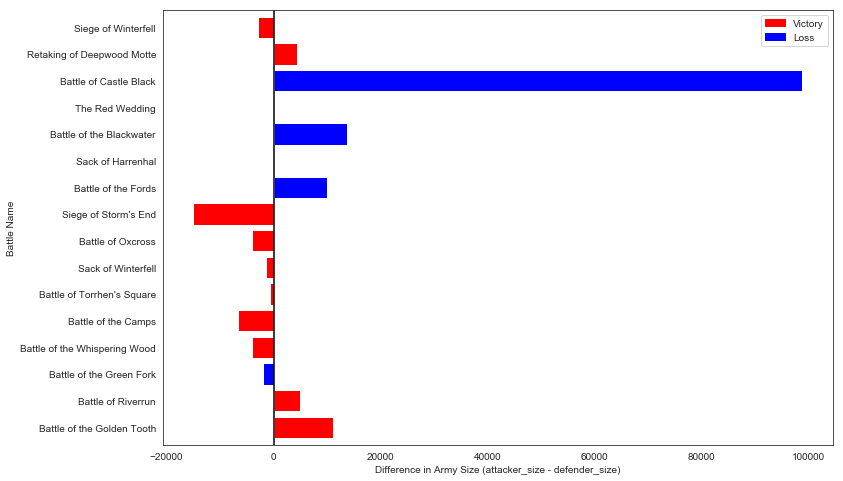

In [271]:
import matplotlib.patches as mpatches
p = data.Difference_Size.plot.barh(figsize = (12, 8), width = .8, color = ['red' if x == "win" else 'blue' if x == "loss" else "white" for x in data.attacker_outcome.values])
p.legend(handles = [mpatches.Patch(color = 'red', label = "Victory", aa = True), mpatches.Patch(color = 'blue', label = "Loss", aa = True)])
p.axvline(0, color = 'k'), p.set(yticklabels = battles.name.iloc[data.index].values, xlabel = "Difference in Army Size (attacker_size - defender_size)", ylabel = "Battle Name")
plt.show()

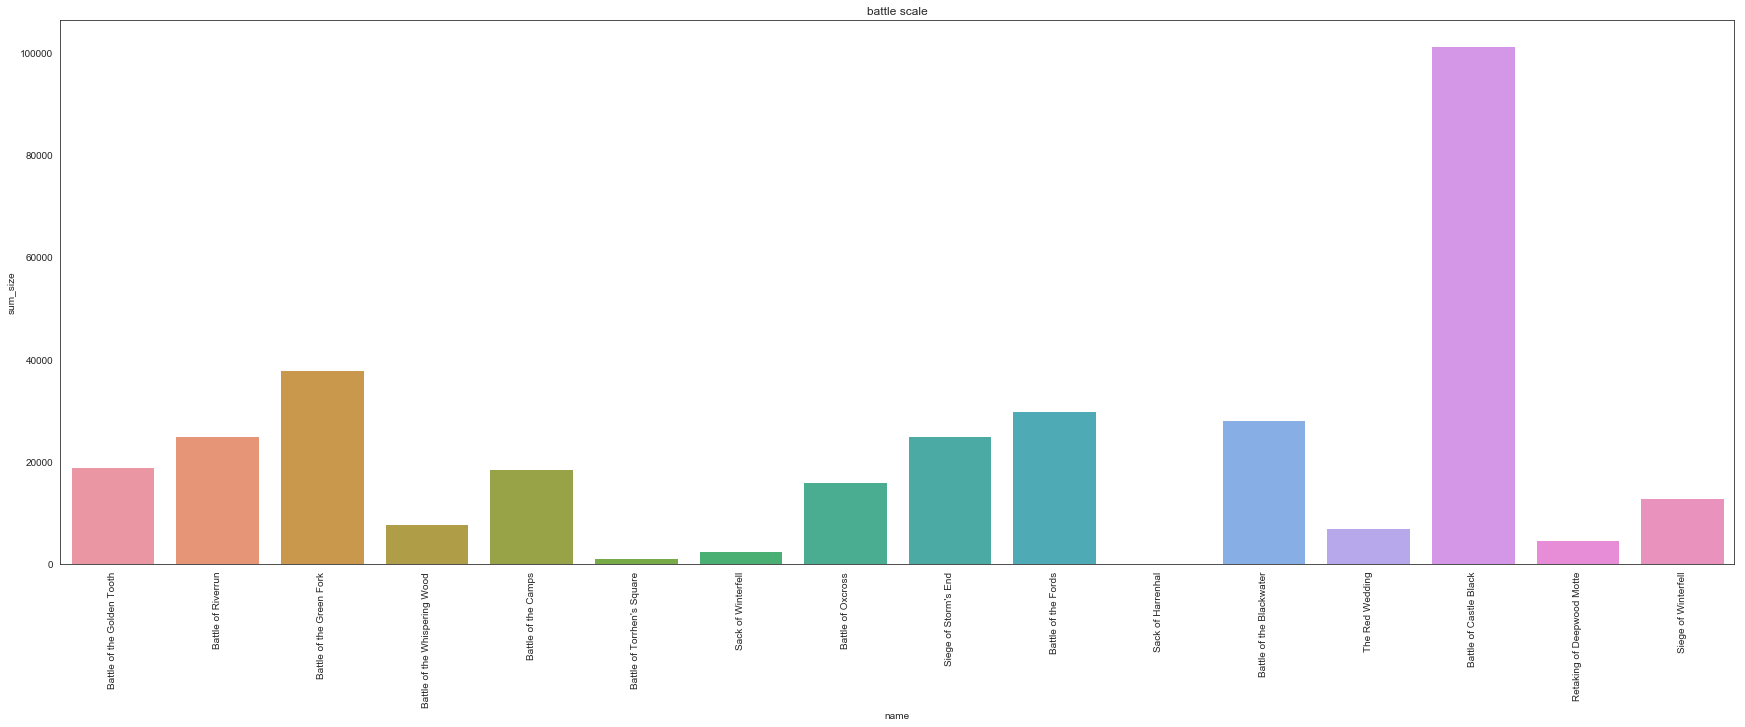

In [272]:
fig, axis1 = plt.subplots(1,1,figsize=(30,10))
axis1.set_title("battle scale")
sns.barplot(x='name', y='sum_size', data=data)
plt.xticks(rotation=90)
plt.show()

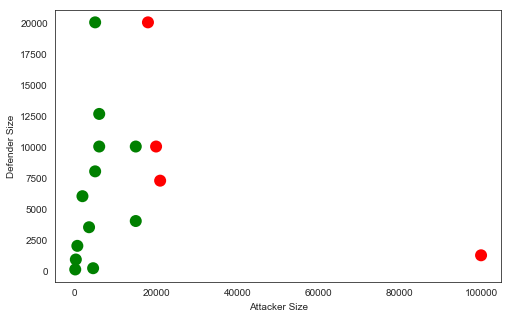

In [281]:
colors = ['green' if x == "win" else "red" for x in data.attacker_outcome.values]
size = data.plot.scatter("attacker_size", "defender_size", c = colors, s = 100, lw = 2.,figsize=(8,5))
size.set(xlabel = "Attacker Size", ylabel = "Defender Size")
plt.show()

- 战争结果是否与兵力多少没有关系，只有2场战争是在兵力取得优势的情况下胜利的，其他都是以少胜多，因为战争有很多不可预测性，不是人多就能打赢战争的。

*4、胜负榜单如何？谁是常胜将军？*

In [255]:
#每个家族的获胜次数及获胜率
WIN1=battles[['attacker_king','attacker_outcome']]
WIN1.loc[:,'wintime']=WIN1.attacker_outcome.apply(lambda x: 1 if x=='win' else 0)
WIN1.columns=['king','win','wintime']
WIN2=battles[['defender_king','attacker_outcome']]
WIN2.loc[:,'wintime']=WIN2.attacker_outcome.apply(lambda x: 0 if x=='win' else 1)
WIN2.columns=['king','win','wintime']
sum_win=pd.concat([WIN1,WIN2],axis=0)
add=sum_win.groupby(['king']).sum().reset_index()
add['war_times']=add.king.apply(lambda x:sum(sum_win.king==x))
add['avg_win']=add.wintime/add.war_times
add

,king,wintime,war_times,avg_win
0,Balon/Euron Greyjoy,7,11,0.636364
1,Joffrey/Tommen Baratheon,16,27,0.592593
2,Mance Rayder,1,1,1.000000
3,Renly Baratheon,0,1,0.000000
4,Robb Stark,9,24,0.375000
5,Stannis Baratheon,3,7,0.428571


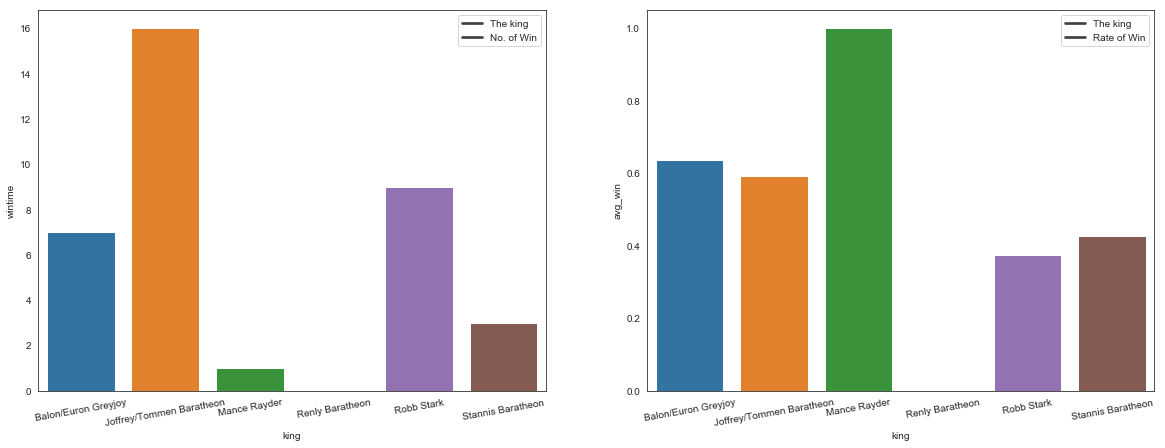

In [257]:
fig, axes = plt.subplots(1,2,figsize=(20, 7))  
win=sns.barplot(x='king', y='wintime', data=add,ax = axes[0])
plt.setp(win.get_xticklabels(), rotation=10)
win.legend(["The king", "No. of Win"])
avg_win=sns.barplot(x='king', y='avg_win', data=add,ax = axes[1])
avg_win.legend(['The king', 'Rate of Win'])
plt.setp(avg_win.get_xticklabels(), rotation=10)
plt.show()

- 可以看出塞外野人只参与了一场战争，并获胜，胜率100%；  
- 狮子家在攻守中参与最多，获胜率59%；  
- 狼家虽然参与了24场战争，但是获胜率只有37%；  
- 海怪家参与了11场战争，有7场获胜，获胜率64%。  

# 二、死亡预测

In [36]:
predictions=pd.read_csv('game of thrones/character-predictions.csv')
predictions.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


- 增加no_of_books：共在几本书中出现

In [37]:
predictions.loc[:, "no_of_books"] = predictions[[x for x in predictions.columns if x.startswith("book")]].sum(axis = 1)

In [32]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 34 columns):
S.No                 1946 non-null int64
actual               1946 non-null int64
pred                 1946 non-null int64
alive                1946 non-null float64
plod                 1946 non-null float64
name                 1946 non-null object
title                938 non-null object
male                 1946 non-null int64
culture              677 non-null object
dateOfBirth          433 non-null float64
DateoFdeath          444 non-null float64
mother               21 non-null object
father               26 non-null object
heir                 23 non-null object
house                1519 non-null object
spouse               276 non-null object
book1                1946 non-null int64
book2                1946 non-null int64
book3                1946 non-null int64
book4                1946 non-null int64
book5                1946 non-null int64
isAliveMother        21 non

S.No:编号    actual：实际是否死亡   pred ：预测是否死亡   alive：活下来的概率     plod ：死亡概率  
name ：名字   title：身份或者地位    male ：性别        culture:信仰     dateOfBirth：出生时间  
DateoFdeath：死亡时间   mother：母亲   father ：父亲   heir：继承人      house：家族   spouse ：配偶 
book1：第一本书   book2：第二本书     book3：第三本书      book4：第四本书       book5：第五本书  
isAliveMother：母亲是否活着     isAliveFather：父亲是否活着       isAliveHeir：继承人是否活着  
isAliveSpouse：配偶是否活着     isMarried：是否已婚      isNoble：是否贵族        age：年龄  
numDeadRelations：与多少死者有联系    boolDeadRelations：布尔，为空时为0    isPopular：是否受欢迎  
popularity：欢迎度        isAlive：是否还活着       no_of_books：共在几本书中出现  

- 删除名字和之前预测的结果，此次分析只使用实际死亡作为y

## 1、数据清洗

In [38]:
predictions.drop(["name", "alive", "pred", "plod", "isAlive", "dateOfBirth", "DateoFdeath"], 1, inplace = True)

- 把信仰相似的合并在一起

In [39]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def get_cult(value):
    value = value.lower()
    v = [k for (k, v) in cult.items() if value in v]
    return v[0] if len(v) > 0 else value.title()
predictions.loc[:, "culture"] = [get_cult(x) for x in predictions.culture.fillna("")]

- 使用factorize（）将这些映射成一组数字

In [40]:
predictions.loc[:, "title"] = pd.factorize(predictions.title)[0]
predictions.loc[:, "culture"] = pd.factorize(predictions.culture)[0]
predictions.loc[:, "mother"] = pd.factorize(predictions.mother)[0]
predictions.loc[:, "father"] = pd.factorize(predictions.father)[0]
predictions.loc[:, "heir"] = pd.factorize(predictions.heir)[0]
predictions.loc[:, "house"] = pd.factorize(predictions.house)[0]
predictions.loc[:, "spouse"] = pd.factorize(predictions.spouse)[0]

- 用-1填充空值

In [41]:
predictions.fillna(value = -1, inplace = True)

In [53]:
Odata = predictions.copy(deep=True)

- 查看是否有重复项

In [47]:
sum(X.duplicated())

0

## 2、查看变量之间的相关性

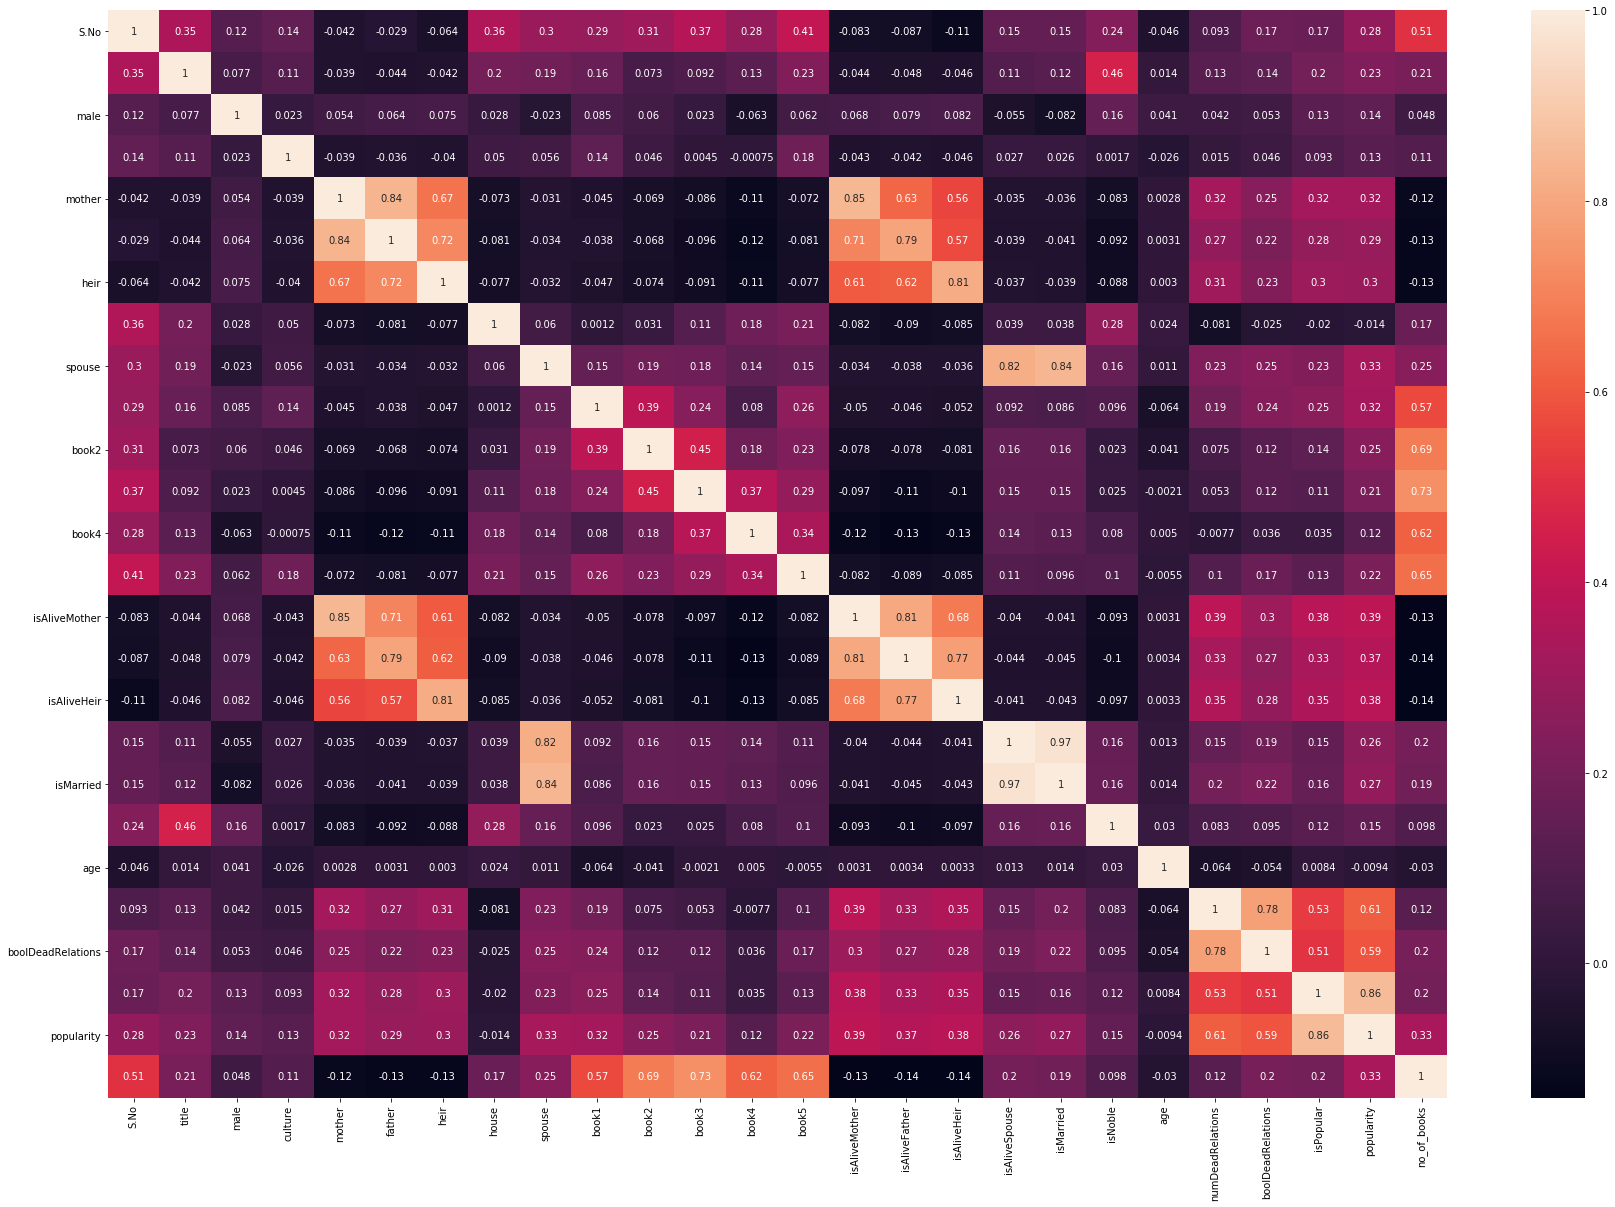

In [51]:
X=predictions.drop(["actual"], 1)
sns.heatmap(X.corr(),annot=True) 
plt.gcf().set_size_inches(30,20);

## 3、查看Y是否平衡

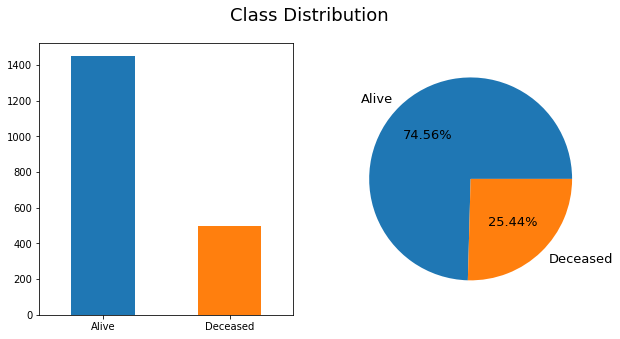

In [55]:
f, ax = plt.subplots(1, 2, figsize = (10,5))
f.suptitle("Class Distribution", fontsize = 18.)
_ = predictions.actual.value_counts().plot.bar(ax = ax[0], rot = 0).set(xticklabels = ["Alive", "Deceased"])
_ = predictions.actual.value_counts().plot.pie(labels = ("Alive", "Deceased"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1])

- 可见类分布不平衡。活着的角色比死了的多得多。  
- 最简单的两种方法是欠抽和过抽。本次，我们将对多数类进行抽样。抽取约死亡人数70%的样本量。
- 使用这个训练-测试分割，建立和比较两个模型:一个XGB分类器模型和一个逻辑回归模型。

## 4、划分测试集和训练集

In [68]:
X_train = predictions[predictions.actual== 0].sample(350, random_state = 30).append(predictions[predictions.actual == 1].sample(350, random_state = 30)).copy(deep = True).astype(np.float64)
Y_train = X_train.actual.values
X_test = predictions[~predictions.index.isin(X_train.index)].copy(deep = True).astype(np.float64)
Y_test = X_test.actual.values
X_train.drop(["S.No", "actual"], 1, inplace = True)
X_test.drop(["S.No", "actual"], 1, inplace = True)

In [69]:
print(X_train.shape,X_test.shape)

(700, 25) (1246, 25)


## 5、建模（xgboost、LogisticRegression、KNN、SVM）

In [56]:
from xgboost import plot_importance
from xgboost import XGBClassifier as XGBC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, log_loss, confusion_matrix, precision_score, recall_score, classification_report, accuracy_score

### xgboost

In [122]:
clf_xgb = XGBC(subsample = .8, colsample_bytree = .8, seed = 14, max_depth = 3)
clf_xgb.fit(X_train, Y_train)
preds_xgb = clf_xgb.predict_proba(X_test)
print(f"train score: {clf_xgb.score(X_train,Y_train)}")
print(f"test score: {clf_xgb.score(X_test,Y_test)}")

train score: 0.8557142857142858
test score: 0.7648475120385233


### LogisticRegression

In [102]:
logreg = LogisticRegression().fit(X_train, Y_train)
preds_lr = logreg.predict_proba(X_test)
print(f"train score: {logreg.score(X_train,Y_train)}")
print(f"test score: {logreg.score(X_test,Y_test)}")

train score: 0.6657142857142857
test score: 0.6476725521669342


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### KNN

In [160]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, Y_train)
#n_neighbors最近的点个数
preds_knn=knn.predict_proba(X_test)
print(f"train score: {knn.score(X_train,Y_train)}")
print(f"test score: {knn.score(X_test,Y_test)}")

train score: 0.7914285714285715
test score: 0.6356340288924559


### SVM

In [207]:
from sklearn.svm import SVC, LinearSVC
svc = SVC(C=1.2,gamma=0.0005).fit(X_train,Y_train)#'rbf', 'poly' and 'sigmoid'
#调整惩罚值C和gamma值
preds_svc=svc.predict(X_test)
print(f"train score: {svc.score(X_train,Y_train)}")
print(f"test score: {svc.score(X_test,Y_test)}")

train score: 0.6842857142857143
test score: 0.680577849117175


## 6、模型评估

### 混淆矩阵

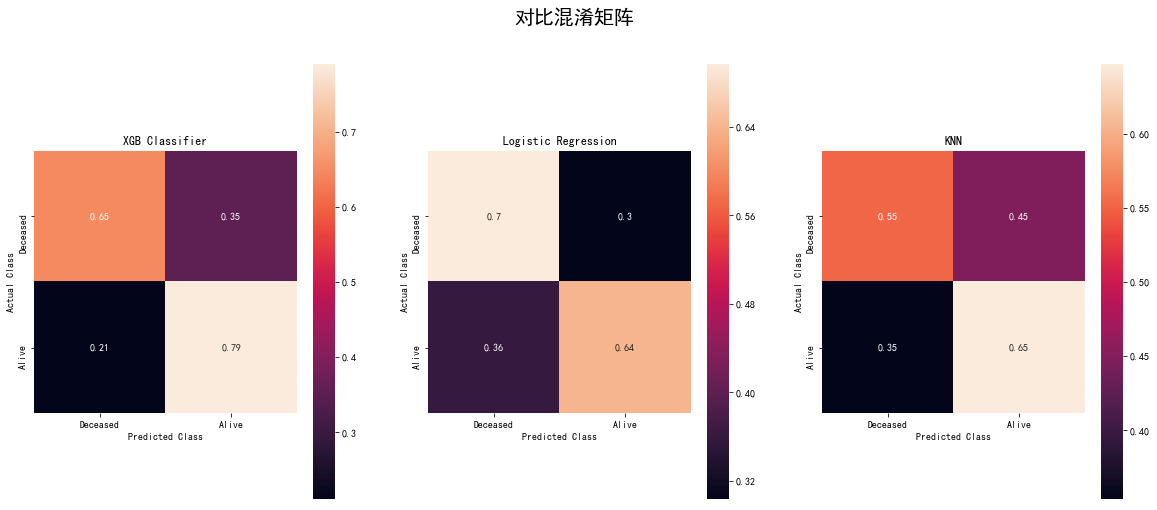

In [238]:
plt.rcParams['font.sans-serif'] = ['SimHei']
f, ax = plt.subplots(1, 3, figsize = (20, 8))
f.suptitle("对比混淆矩阵", fontsize = 20.)
# 编写的混淆矩阵的可视化函数 
#p：测试集模型  t：模型名称
def cm_plot(p, t, axis):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(Y_test, np.argmax(p, axis = 1))#混淆矩阵
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]#计算占比
    _ = sns.heatmap(cm, square = True, xticklabels = ["Deceased", "Alive"], annot = True,
                     yticklabels = ["Deceased", "Alive"], ax = ax[axis]).set( xlabel = "Predicted Class", ylabel = "Actual Class", title = t)

cm_plot(preds_xgb, "XGB Classifier", 0)
cm_plot(preds_lr, "Logistic Regression", 1)
cm_plot(preds_knn, "KNN", 2)

### AUC 、损失函数、精确度

In [140]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [233]:
print("XGB Classifier Performance\n" + "=" * 30 + "\n", classification_report(Y_test, np.argmax(preds_xgb, axis = 1), target_names = ["Deceased", "Alive"]))
print("AUC      : %.4f" % roc_auc_score(Y_test, preds_xgb[:, 1]))
print("Accuracy : %.4f" % accuracy_score(Y_test, np.argmax(preds_xgb, axis = 1)))
print("Log Loss : %.4f\n\n" % log_loss(Y_test, preds_xgb[:, 1]))
print("Logistic Regression Performance\n" + "=" * 30 + "\n", classification_report(Y_test, np.argmax(preds_lr, axis = 1), target_names = ["Deceased", "Alive"]))
print("AUC      : %.4f" % roc_auc_score(Y_test, preds_lr[:, 1]))
print("Accuracy : %.4f" % accuracy_score(Y_test, np.argmax(preds_lr, axis = 1)))
print("Log Loss : %.4f" % log_loss(Y_test, preds_lr[:, 1]))
print("KNN\n" + "=" * 30 + "\n", classification_report(Y_test, np.argmax(preds_knn, axis = 1), target_names = ["Deceased", "Alive"]))
print("AUC      : %.4f" % roc_auc_score(Y_test, preds_knn[:, 1]))
print("Accuracy : %.4f" % accuracy_score(Y_test, np.argmax(preds_knn, axis = 1)))
print("Log Loss : %.4f" % log_loss(Y_test, preds_knn[:, 1]))

XGB Classifier Performance
               precision    recall  f1-score   support

    Deceased       0.29      0.65      0.40       145
       Alive       0.94      0.79      0.86      1101

   micro avg       0.77      0.77      0.77      1246
   macro avg       0.62      0.72      0.63      1246
weighted avg       0.87      0.77      0.81      1246

AUC      : 0.7900
Accuracy : 0.7729
Log Loss : 0.5422


Logistic Regression Performance
               precision    recall  f1-score   support

    Deceased       0.20      0.70      0.32       145
       Alive       0.94      0.64      0.76      1101

   micro avg       0.65      0.65      0.65      1246
   macro avg       0.57      0.67      0.54      1246
weighted avg       0.86      0.65      0.71      1246

AUC      : 0.7480
Accuracy : 0.6477
Log Loss : 0.5878
KNN
               precision    recall  f1-score   support

    Deceased       0.17      0.55      0.26       145
       Alive       0.92      0.65      0.76      1101

   mic

### ROC 曲线

Text(0.5, 1.0, 'ROC Curves')

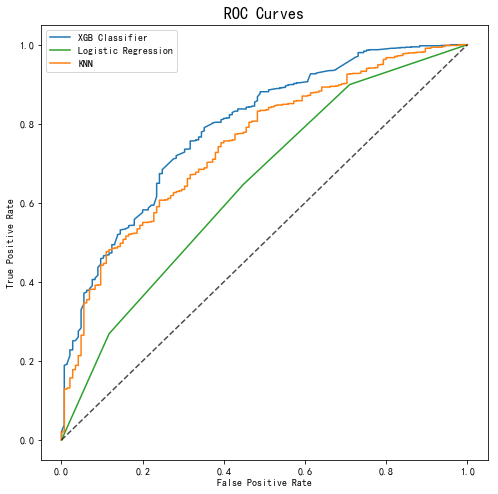

In [232]:
_ = plt.figure(figsize = (8, 8)),
plt.plot(*roc_curve(Y_test, preds_xgb[:, 1])[:2])
plt.plot(*roc_curve(Y_test, preds_knn[:, 1])[:2],c = sns.color_palette()[2])
plt.plot(*roc_curve(Y_test, preds_lr[:, 1])[:2],c = sns.color_palette()[1])
plt.legend(["XGB Classifier", "Logistic Regression",'KNN'], loc = "upper left")
_ = plt.plot((0., 1.), (0., 1.), "--k", alpha = .7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves", fontsize = 16.)